1 Trace(s) in Stream:
IU.ANMO.00.BHZ | 2010-02-27T06:30:00.019538Z - 2010-02-27T10:29:59.969538Z | 20.0 Hz, 288000 samples
IU.ANMO.00.BHZ | 2010-02-27T06:30:00.019538Z - 2010-02-27T10:29:59.969538Z | 20.0 Hz, 288000 samples
         network: IU
         station: ANMO
        location: 00
         channel: BHZ
       starttime: 2010-02-27T06:30:00.019538Z
         endtime: 2010-02-27T10:29:59.969538Z
   sampling_rate: 20.0
           delta: 0.05
            npts: 288000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 1243, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 636416})
      processing: ["ObsPy 1.4.0: filter(options={'freq': 0.1}::type='highpass')"]
[-45337.23320263 -41679.70836122 -38166.59251038 ...   1671.33330711
   1758.18384819   1844.10169125]


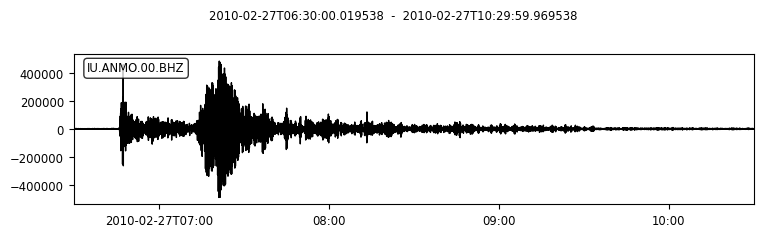

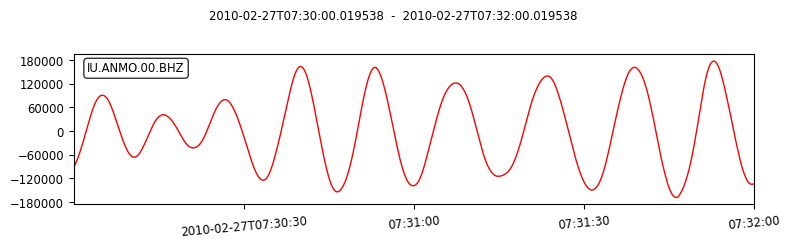

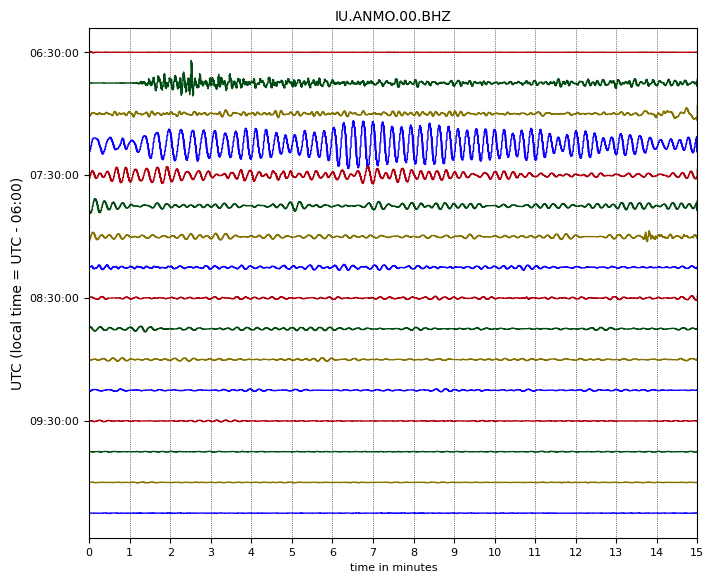

C:\Users\paige\anaconda3\lib\site-packages\obspy\imaging\waveform.py:506: UserWarning: Could not download the events because of 'FDSNNoServiceException: No FDSN services could be discovered at 'http://www.seismicportal.eu'. This could be due to a temporary service outage or an invalid FDSN service address.'.
  warnings.warn(msg)


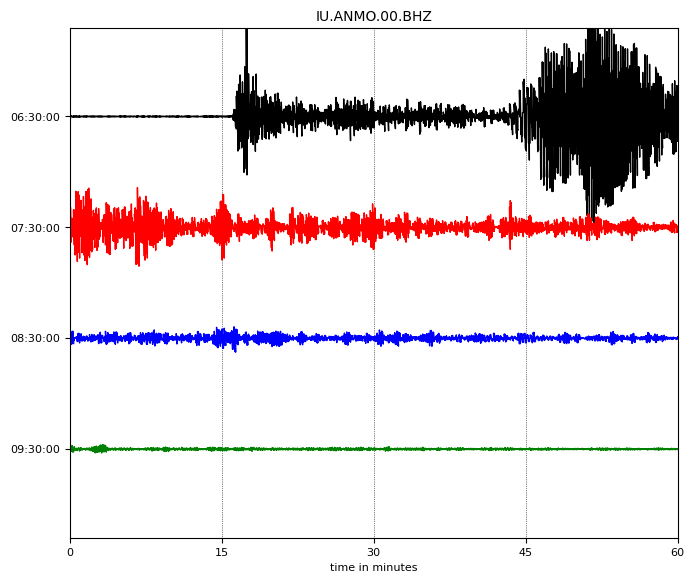

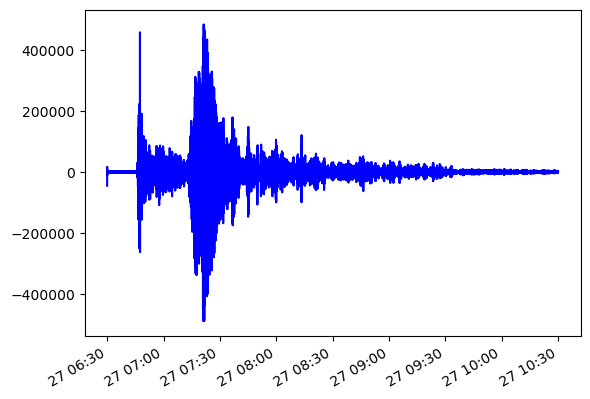

In [23]:
import xarray as xr
import matplotlib.pyplot as plt
from obspy import read_inventory, read
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime, Stream, read


st = read("fdsnws-dataselect_2023-04-04t16_59_45z.mseed")
st2 = read('fdsnws-dataselect_2023-04-06t17_08_37z.mseed')  

channels = ['BHZ']

# stream 
st.filter(type='highpass', freq=0.1)
st = st.select(component='Z')
print(st)  

#trace 
tr = st[0]
print(tr)
print(tr.stats) 
print(tr.data)

st.plot()
dt = st[0].stats.starttime
st.plot(color='red', tick_rotation=5, tick_format='%I:%M %p',
                   starttime=dt + 60*60, endtime=dt + 60*60 + 120)\

st.plot(type='dayplot')

st.plot(type="dayplot", interval=60, right_vertical_labels=False,
        vertical_scaling_range=5e5, one_tick_per_line=True,
        color=['k', 'r', 'b', 'g'], show_y_UTC_label=False,
        events={'min_magnitude': 6.5})

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()